In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [3]:
df=pd.read_csv('C:\\Users\\PC\\Documents\\DA\\datas\\TV_Sales.csv')

In [4]:
df.head()

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      4562 non-null   float64
 1   Sales   4566 non-null   float64
dtypes: float64(2)
memory usage: 71.6 KB


In [21]:
df.isnull().mean()*100

TV       0.218723
Sales    0.131234
dtype: float64

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [26]:
x=df[['Sales']].values

In [27]:
x

array([[ 54.73275715],
       [ 46.67789698],
       [150.1778288 ],
       ...,
       [163.6314574 ],
       [253.6104113 ],
       [148.2024141 ]])

In [28]:
y=df[['TV']].values

In [29]:
y

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

In [30]:
sc = MinMaxScaler()

In [31]:
x= sc.fit_transform(x)

In [32]:
x

array([[0.07069612],
       [0.04649866],
       [0.35742099],
       ...,
       [0.3978368 ],
       [0.66814099],
       [0.35148668]])

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [34]:
model = LinearRegression()

In [35]:
model.fit(x_train,y_train)

LinearRegression()

In [36]:
model.coef_

array([[93.38513731]])

In [37]:
model.intercept_

array([8.82090864])

In [38]:
training_score = model.score(x_train,y_train)*100

In [39]:
training_score

99.90045933122671

In [40]:
R2_score = r2_score(y_test,model.predict(x_test))*100

In [41]:
R2_score

99.89538576402268

# Mean absolute error

In [43]:
mae = mean_absolute_error(y_test, model.predict(x_test))
mae

0.6726504597525392

In [44]:
mse = mean_squared_error(y_test, model.predict(x_test))
mse

0.7005160693705954

In [45]:
y_pred = model.predict(x)

In [46]:
y_pred

array([[15.42287546],
       [13.16319194],
       [42.19871643],
       ...,
       [45.97295237],
       [71.21534697],
       [41.6445402 ]])

In [47]:
Output = pd. DataFrame(zip(y,y_pred),columns=('ACTUAL','PREDICTED'),dtype= float)
Output.head()

,ACTUAL,PREDICTED
0,16.0,15.422875
1,13.0,13.163192
2,41.0,42.198716
3,83.0,83.737361
4,15.0,15.945073


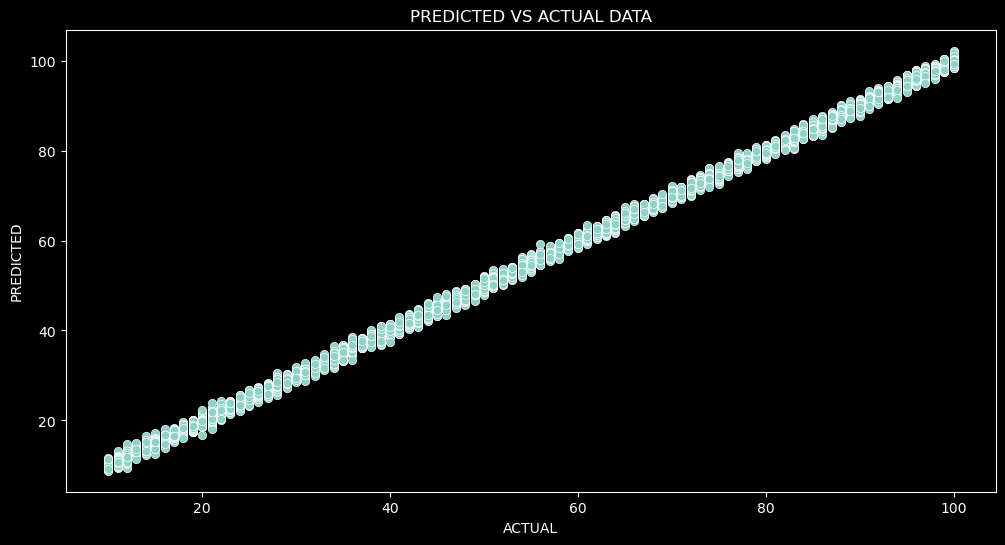

In [48]:
plt.figure(figsize=(12,6))
plt.title('PREDICTED VS ACTUAL DATA')
plt.xticks()
sns.scatterplot(data=Output,x='ACTUAL', y = 'PREDICTED');

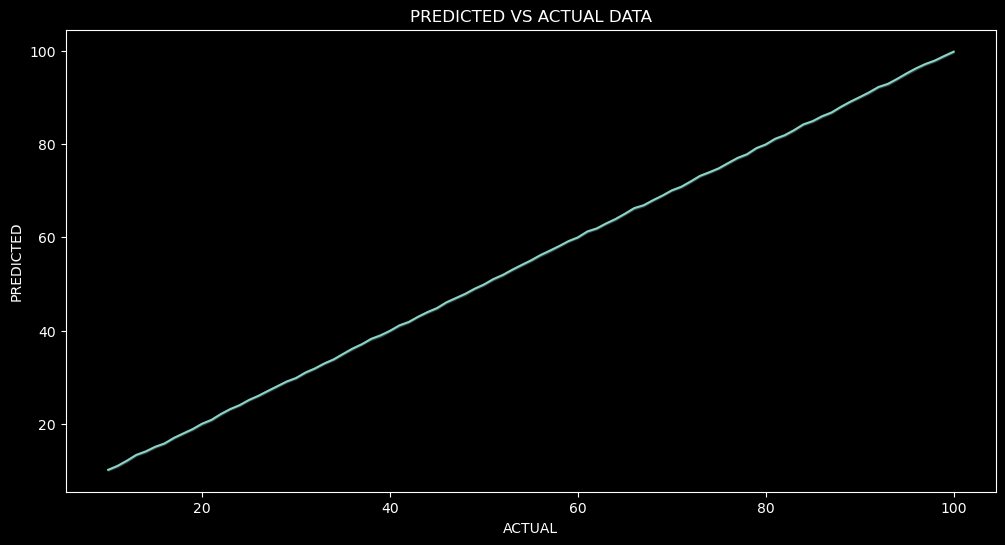

In [49]:
plt.figure(figsize=(12,6))
plt.title('PREDICTED VS ACTUAL DATA')
plt.xticks()
sns.lineplot(data=Output,x='ACTUAL', y = 'PREDICTED');